In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')  # read the data
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)

print(data.isna().sum())

#printing the summary of data type
data.info() 

(1470, 35)
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0

In [4]:
#first drop columns then remove duplicates & recheck the size

data.drop('EmployeeCount', axis = 1, inplace = True)
data.drop('StandardHours', axis = 1, inplace = True)
data.drop('EmployeeNumber', axis = 1, inplace = True)
data.drop('Over18', axis = 1, inplace = True)

data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 31)


In [5]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,2.721769,NaN,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,1.093082,NaN,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,2.000000,NaN,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,3.000000,NaN,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,4.000000,NaN,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


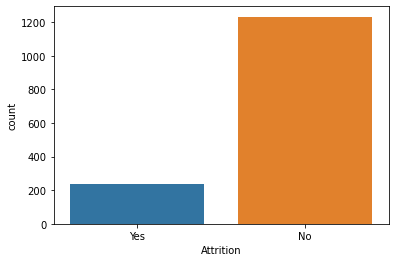

In [6]:
#plot each class frequency
sns.countplot(x='Attrition',data=data)
plt.show()

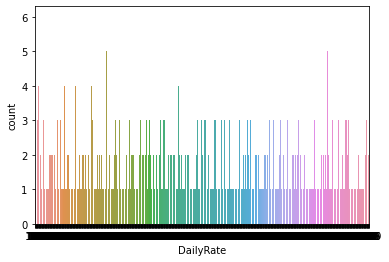

In [7]:
sns.countplot(x='DailyRate',data=data)
plt.show()

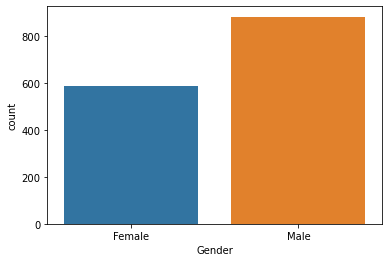

In [8]:
sns.countplot(x='Gender',data=data)
plt.show()

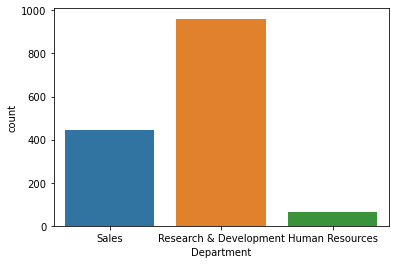

In [9]:
sns.countplot(x='Department',data=data)
plt.show()

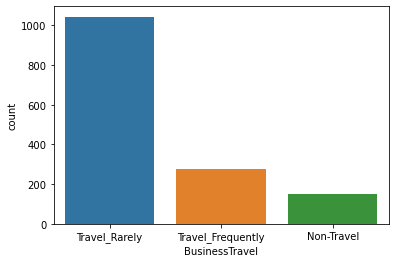

In [10]:
sns.countplot(x='BusinessTravel',data=data)
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

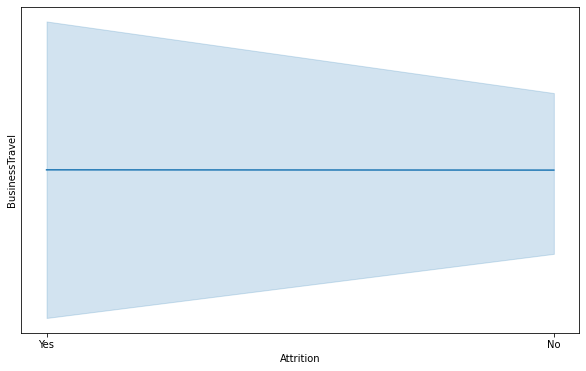

In [11]:
plt.figure(figsize =(10, 6))
sns.lineplot(y ='BusinessTravel', x ='Attrition', data = data)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

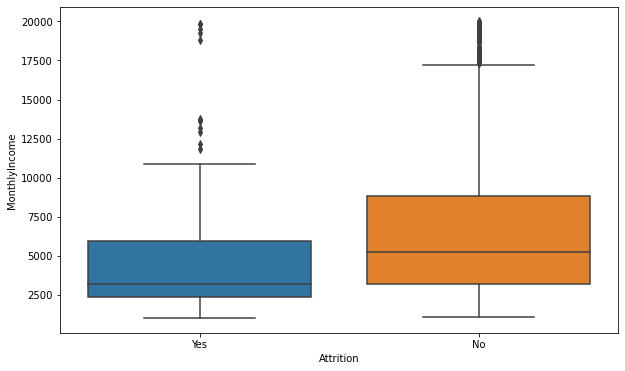

In [12]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = data)

In [13]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['Gender']) 
pd.Series(df)
data["Gender"]=df

In [14]:
df=label.fit_transform(data['Attrition'])  #use encoder for Attrition
pd.Series(df)
data["Attrition"]=df

In [15]:
df=label.fit_transform(data['OverTime']) #use encoder for Overtime
pd.Series(df)
data["OverTime"]=df

In [16]:
data.tail(2) # check the data set again

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,3,4,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,2,1,...,3,1,0,6,3,4,4,3,1,2


In [17]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [18]:
# Lets use get_dummies encoder tech to convert the categorical columns into int
df_dummies=pd.get_dummies(data[cat_col],drop_first=True)
df_dummies.head(2)# check data again 

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [19]:
df_dummies.shape # check the dummies shape

(1470, 19)

In [20]:
data=data.join(df_dummies) #join to orignal dataset

In [21]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,0,0,0,0,0,0,1,0,0,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,0,0,0,0,0,1,0,0,1,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,0,0,0,0,0,1,0,0,1,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,...,0,1,0,0,0,0,0,0,1,0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,1,...,0,0,0,1,0,0,0,0,1,0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,0,0,0,0,0,0,1,0,1,0


In [22]:
data.drop(columns=cat_col,axis=1,inplace=True)# drop the categorical columns 

In [23]:
data.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1


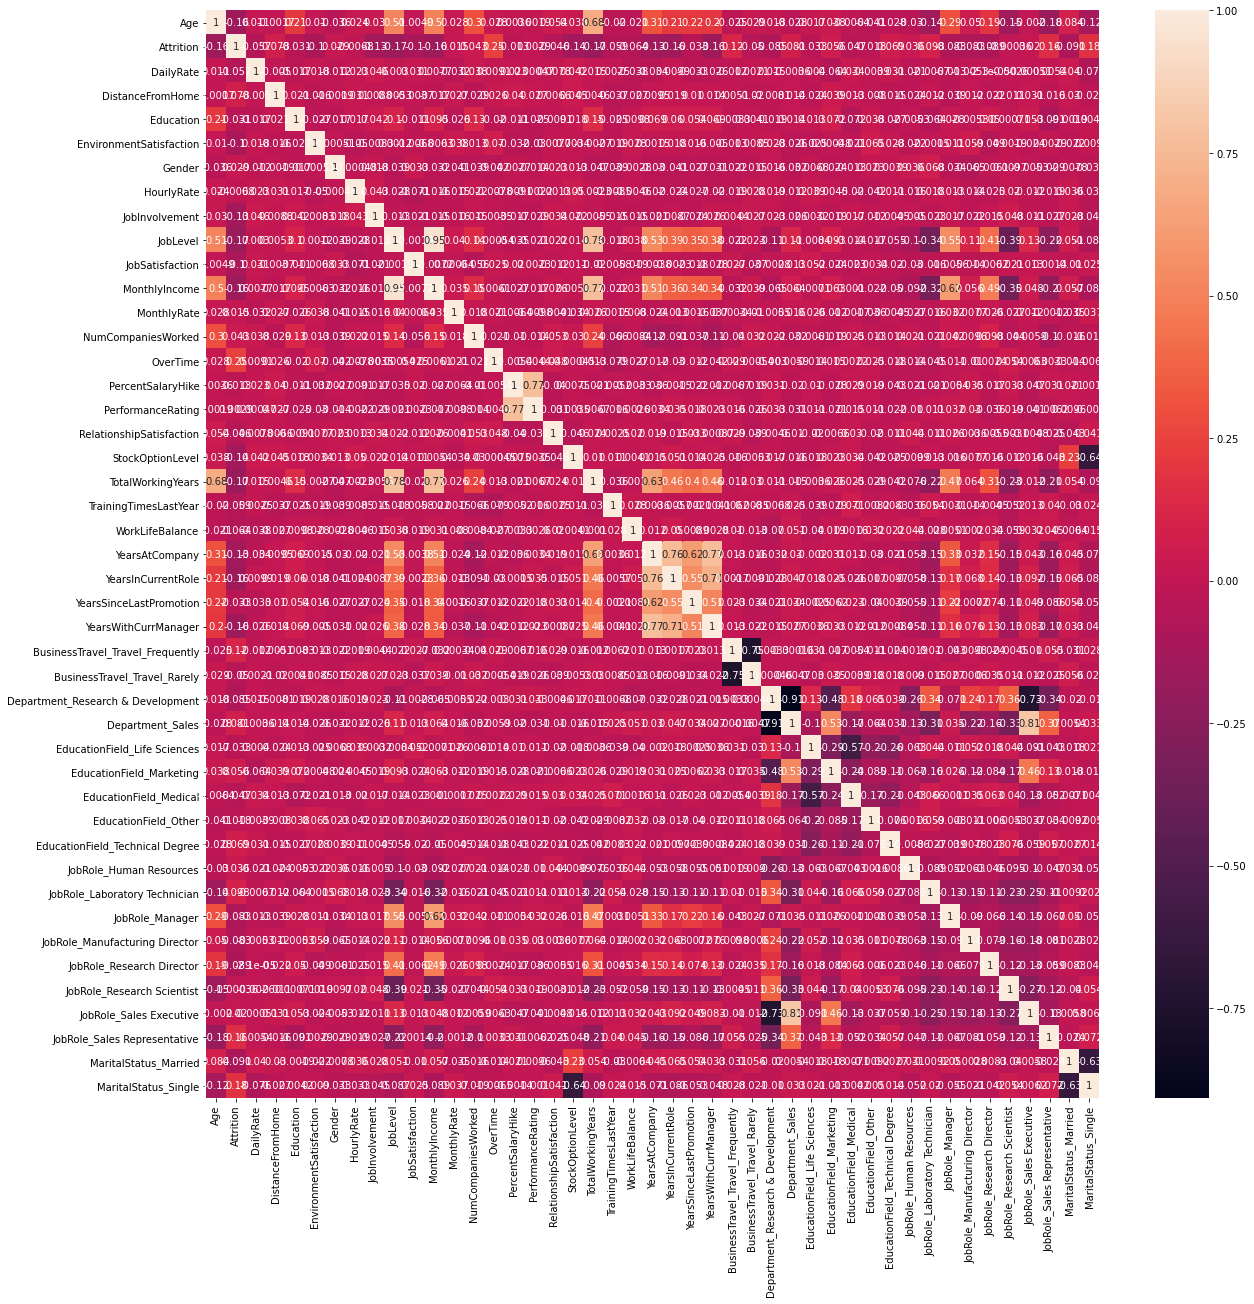

In [24]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [25]:
data.skew() # Lets check the skewness 

Age                                  0.413286
Attrition                            1.844366
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
Gender                              -0.408665
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobLevel                             1.025401
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
OverTime                             0.964489
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                   

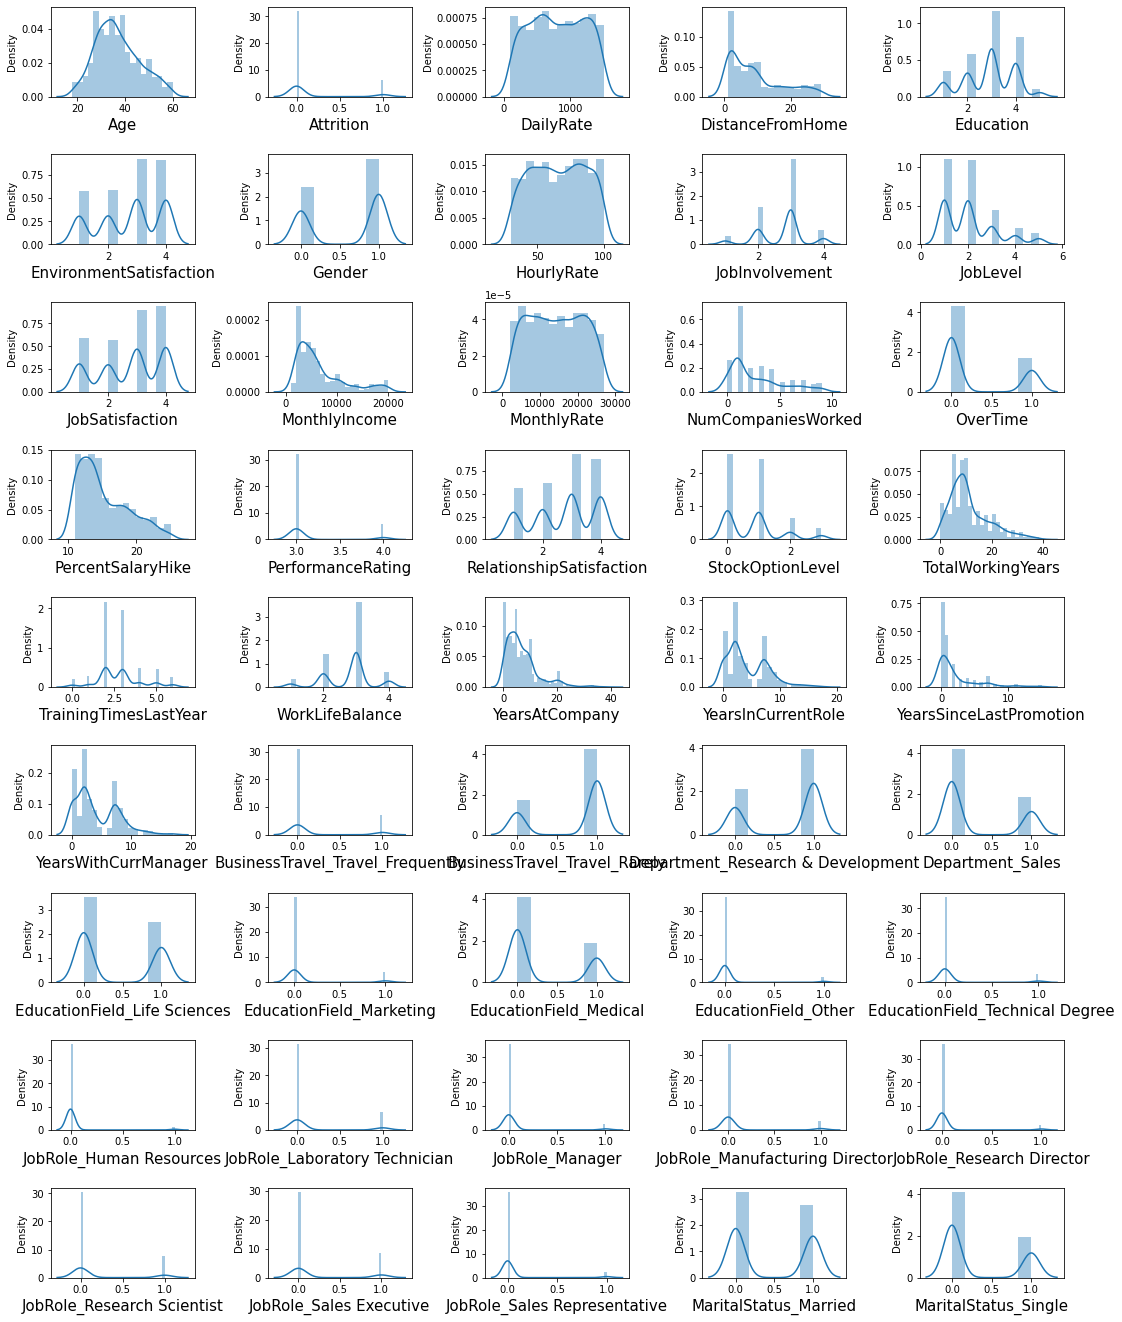

In [26]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [27]:
#Lets Use Power transformation to remove the skewness for the independant variables
from sklearn.preprocessing import PowerTransformer

fetures=['DistanceFromHome','MonthlyIncome','JobLevel','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
pt=PowerTransformer()
data[fetures]=pt.fit_transform(data[fetures].values)

In [28]:
data[fetures]

,DistanceFromHome,MonthlyIncome,JobLevel,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.494085,0.285965,0.241622,1.621331,-1.488918,-0.244305,0.139692,0.205562,-1.094862,0.490147
1,0.243416,0.052833,0.241622,-0.571302,1.679689,0.052495,0.762660,0.883888,0.096854,0.909635
2,-1.031215,-1.447625,-1.170135,1.271339,0.201133,-0.410500,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.700347,-0.863050,-1.170135,-0.571302,-1.488918,-0.244305,0.482432,0.883888,0.905592,-1.550156
4,-1.031215,-0.567909,-1.170135,1.766182,-0.948760,-0.592063,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...
1465,1.407126,-1.076843,0.241622,0.792695,0.719724,0.859893,-0.066114,-0.446645,-1.094862,-0.053000
1466,-0.050827,1.002362,1.009822,0.792695,0.201133,-0.090665,0.320677,0.883888,0.096854,0.909635
1467,-0.442291,0.322118,0.241622,-0.571302,1.281630,-0.592063,0.139692,-0.446645,-1.094862,-0.053000
1468,-1.031215,0.127762,0.241622,0.043423,-0.121307,0.859893,0.628829,0.682995,-1.094862,1.090110


In [29]:
data.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,-1.494085,2,2,0,94,3,0.241622,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,0.243416,1,3,1,61,2,0.241622,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,-1.031215,2,4,1,92,2,-1.170135,...,0,1,0,0,0,0,0,0,0,1


In [30]:
data.shape

(1470, 45)

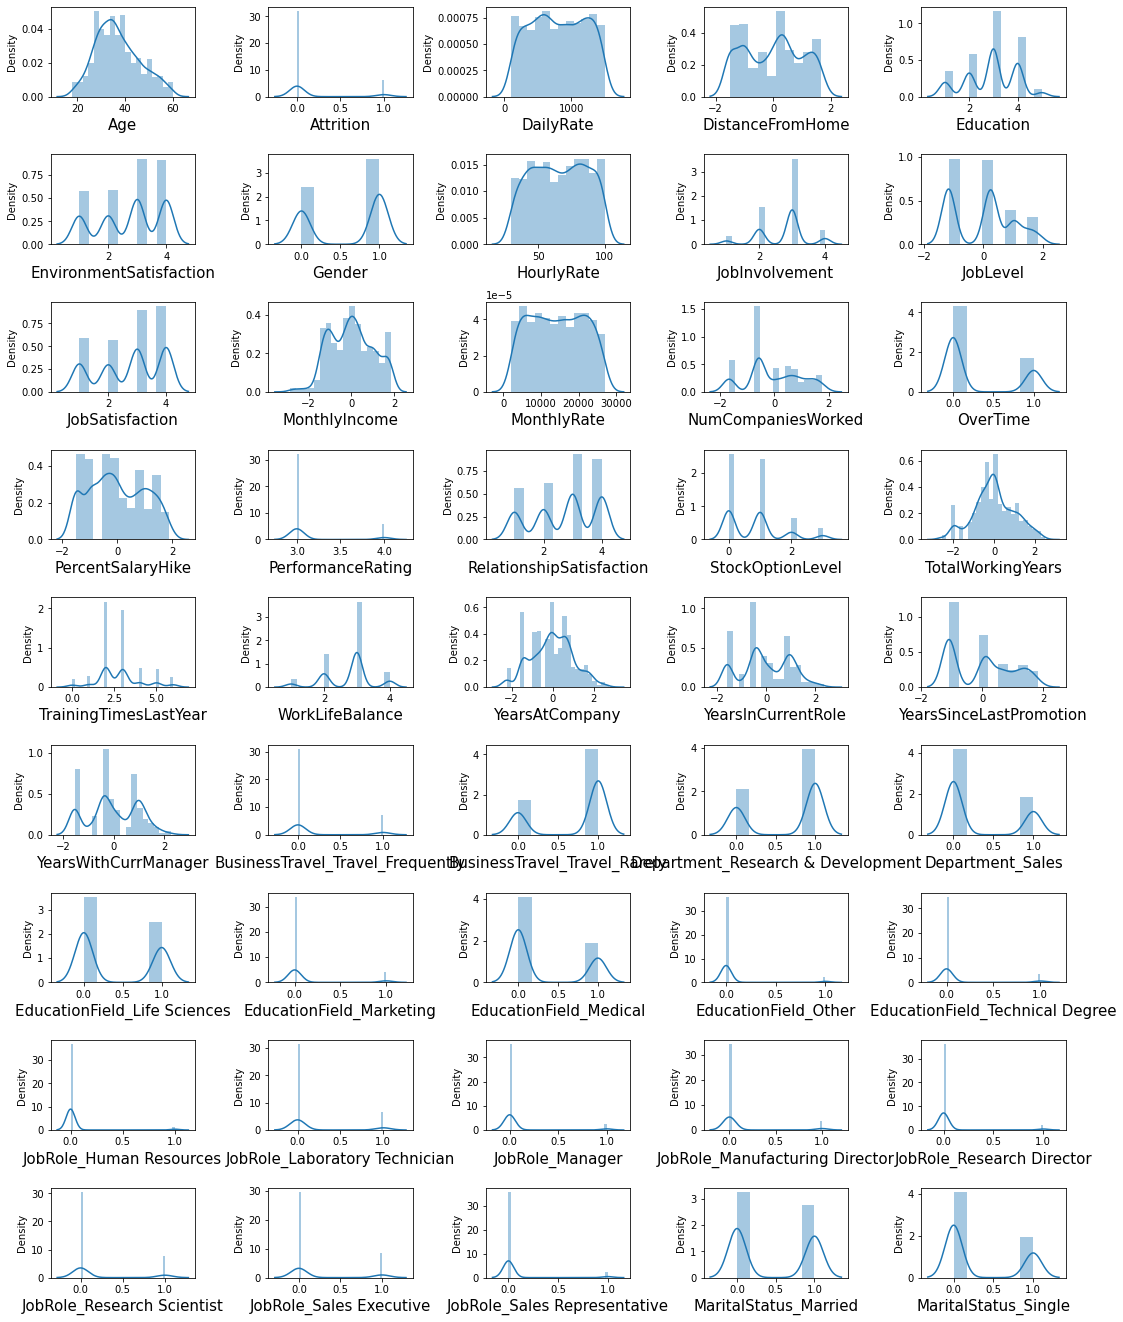

In [31]:
#Let's see again how data is distributed or Graphical analysis of all features after removing the skewness.
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

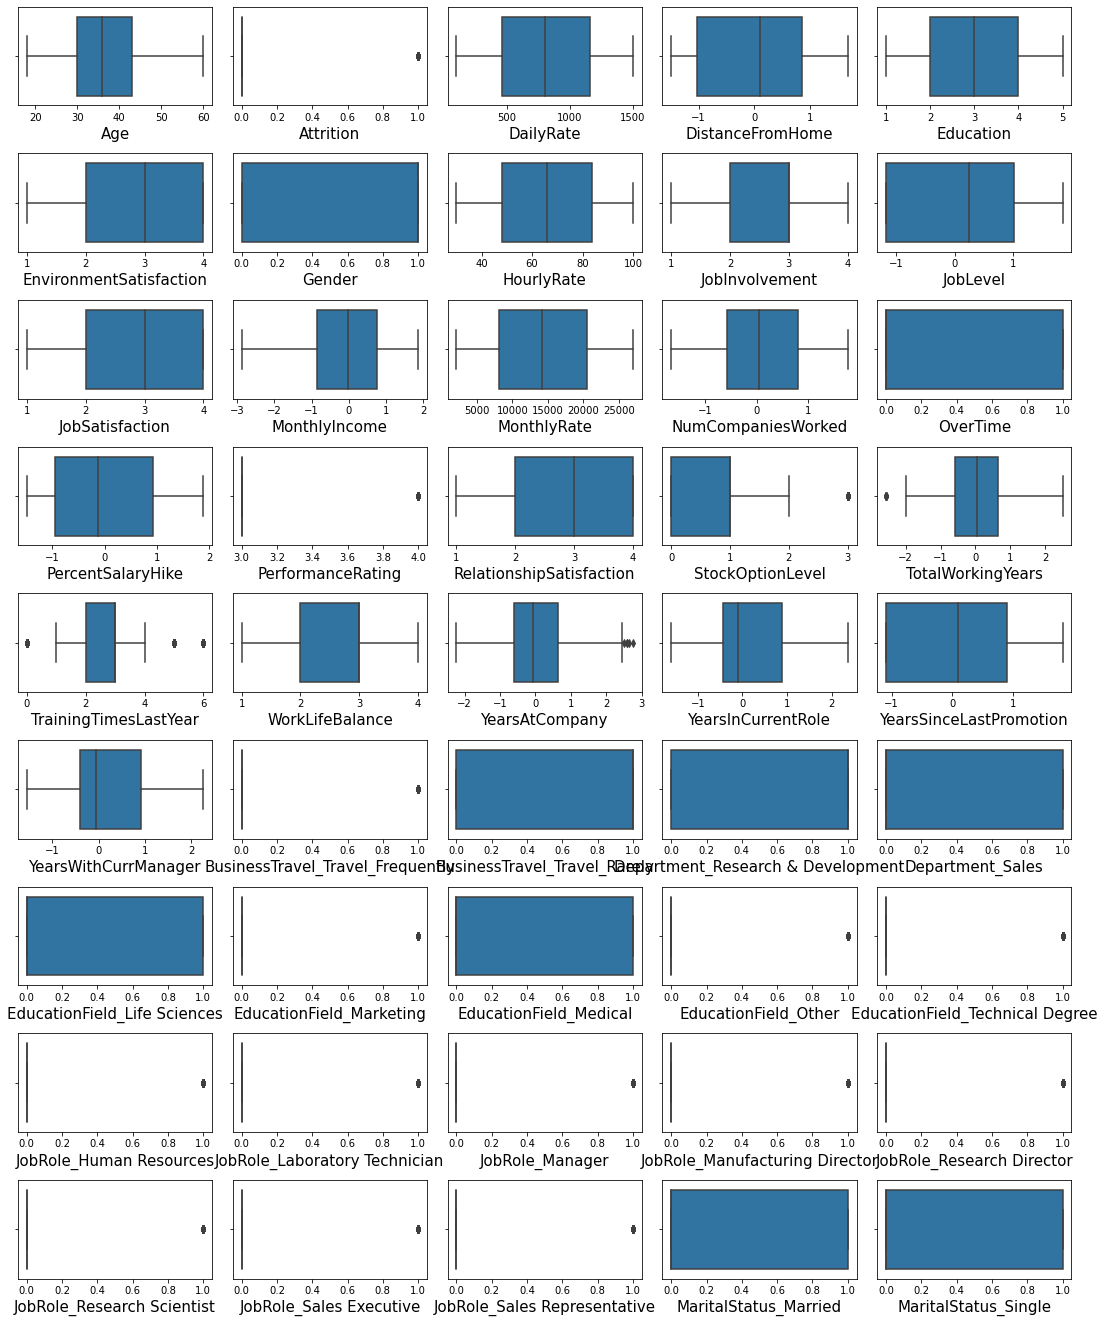

In [32]:
# Now the data looks gerat lets move to furthe steps lets check the outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [33]:
# From above box plot we can see ther are outliers present in the data so lets use zscore to remove outliers
z_score=zscore(data)
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data1=data[filtering_entry]

In [34]:
data1.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,-1.494085,2,2,0,94,3,0.241622,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,0.243416,1,3,1,61,2,0.241622,...,0,0,0,0,0,1,0,0,1,0
3,33,0,1392,-0.700347,4,4,0,56,3,-1.170135,...,0,0,0,0,0,1,0,0,1,0


In [35]:
# check the data shape after removing the outliers
data1.shape

(856, 45)

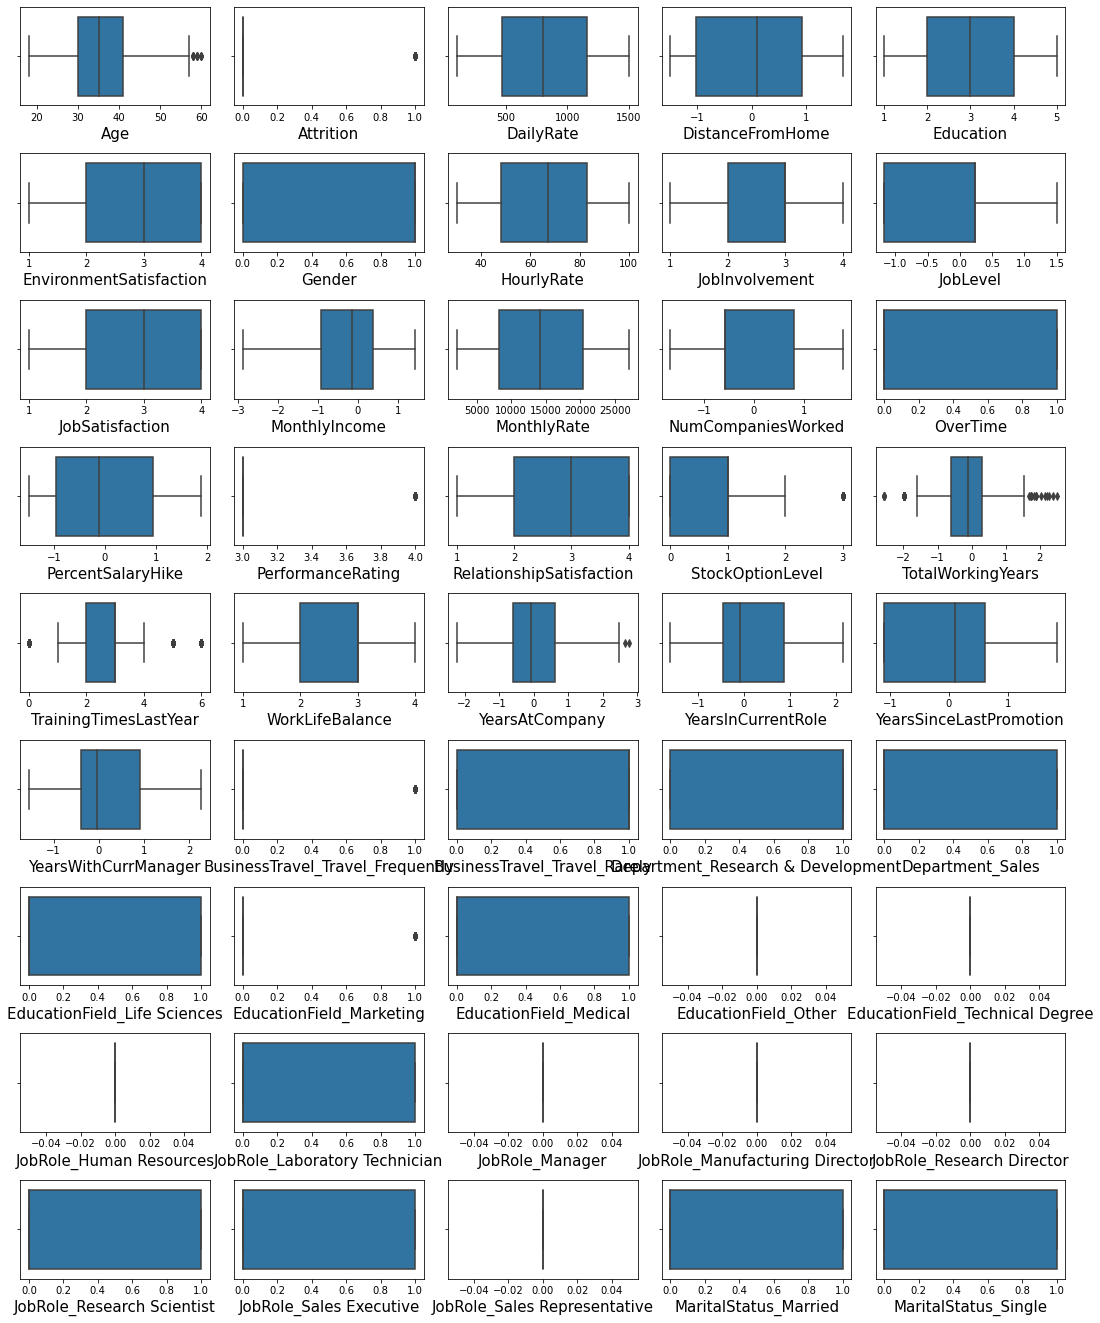

In [36]:
# after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data1:
    if plotnumber<=50:
        ax=plt.subplot(10,5,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [55]:
# Now data looks great so Let's Seperate the data 
x=data.drop(columns=['Attrition'])
y=data['Attrition']

In [56]:
print(data['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [57]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [58]:
# Selecting perfect random state for better accuracy
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_train)
    pred=LR.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {accuracy_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {accuracy_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.8969873663751214
at random sate 0, the testing accuracy is:- 0.891156462585034


at random sate 1, the training accuracy is:- 0.9047619047619048
at random sate 1, the testing accuracy is:- 0.8707482993197279


at random sate 2, the training accuracy is:- 0.902818270165209
at random sate 2, the testing accuracy is:- 0.873015873015873


at random sate 3, the training accuracy is:- 0.9076773566569485
at random sate 3, the testing accuracy is:- 0.873015873015873


at random sate 4, the training accuracy is:- 0.8901846452866861
at random sate 4, the testing accuracy is:- 0.891156462585034


at random sate 5, the training accuracy is:- 0.9037900874635568
at random sate 5, the testing accuracy is:- 0.8616780045351474


at random sate 6, the training accuracy is:- 0.8979591836734694
at random sate 6, the testing accuracy is:- 0.8707482993197279


at random sate 7, the training accuracy is:- 0.9096209912536443
at random sate 7, the testing accuracy

at random sate 64, the testing accuracy is:- 0.8843537414965986


at random sate 65, the training accuracy is:- 0.9096209912536443
at random sate 65, the testing accuracy is:- 0.8639455782312925


at random sate 66, the training accuracy is:- 0.8950437317784257
at random sate 66, the testing accuracy is:- 0.8888888888888888


at random sate 67, the training accuracy is:- 0.8940719144800777
at random sate 67, the testing accuracy is:- 0.8820861678004536


at random sate 68, the training accuracy is:- 0.9154518950437318
at random sate 68, the testing accuracy is:- 0.8662131519274376


at random sate 69, the training accuracy is:- 0.9105928085519922
at random sate 69, the testing accuracy is:- 0.8594104308390023


at random sate 70, the training accuracy is:- 0.9037900874635568
at random sate 70, the testing accuracy is:- 0.8662131519274376


at random sate 71, the training accuracy is:- 0.8989310009718173
at random sate 71, the testing accuracy is:- 0.8684807256235828


at random sate 72

In [74]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=60)

In [75]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 870, 1: 159})
Counter({0: 870, 1: 783})


# Build Model to predict Attrition

In [76]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [77]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [78]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.822141560798548
Test Report: 0.7981859410430839
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.81      0.87       363
           1       0.46      0.76      0.57        78

    accuracy                           0.80       441
   macro avg       0.70      0.78      0.72       441
weighted avg       0.85      0.80      0.82       441

Confusion Matrix: [[293  70]
 [ 19  59]]
Accuracy: 81.13 %
Standard Deviation: 0.71 %


In [79]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.8435374149659864
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91       363
           1       0.71      0.19      0.30        78

    accuracy                           0.84       441
   macro avg       0.78      0.59      0.61       441
weighted avg       0.83      0.84      0.80       441

Confusion Matrix: [[357   6]
 [ 63  15]]
Accuracy: 90.99 %
Standard Deviation: 3.81 %


In [80]:
# Model no.3
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_ns,y_train_ns)

print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(svc,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(svc)


Train Report: 0.9782214156079855
Test Report: 0.8616780045351474
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.94      0.92       363
           1       0.64      0.49      0.55        78

    accuracy                           0.86       441
   macro avg       0.77      0.71      0.74       441
weighted avg       0.85      0.86      0.85       441

Confusion Matrix: [[342  21]
 [ 40  38]]
Accuracy: 90.93 %
Standard Deviation: 0.48 %


In [81]:
#Model no.4
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.764172335600907
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.86      0.86       363
           1       0.32      0.31      0.32        78

    accuracy                           0.76       441
   macro avg       0.59      0.58      0.59       441
weighted avg       0.76      0.76      0.76       441

Confusion Matrix: [[313  50]
 [ 54  24]]
Accuracy: 82.94 %
Standard Deviation: 1.68 %


In [82]:
#Model no.5
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train_ns,y_train_ns)

print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(knn,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(knn)

Train Report: 0.8814277071990321
Test Report: 0.6439909297052154
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.63      0.75       363
           1       0.29      0.69      0.41        78

    accuracy                           0.64       441
   macro avg       0.60      0.66      0.58       441
weighted avg       0.80      0.64      0.69       441

Confusion Matrix: [[230 133]
 [ 24  54]]
Accuracy: 79.01 %
Standard Deviation: 0.89 %


In [86]:
# Hyper tuning by using RandomizedSearchCV With SVC
from sklearn.model_selection import RandomizedSearchCV

para={'C':[0.001,2,3,4,0.1,10],'n_jobs':[1,2,3,4,6],'random_state':range(0,100,2),'max_iter':range(100,1000,100)}
rand=RandomizedSearchCV(estimator=LR, cv=2,param_distributions=para)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'random_state': 4, 'n_jobs': 4, 'max_iter': 400, 'C': 2}

In [87]:
LR= LogisticRegression(random_state= 4,n_jobs=4, max_iter=400, C= 2)
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.822141560798548
Test Report: 0.800453514739229
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.81      0.87       363
           1       0.46      0.76      0.57        78

    accuracy                           0.80       441
   macro avg       0.70      0.78      0.72       441
weighted avg       0.85      0.80      0.82       441

Confusion Matrix: [[294  69]
 [ 19  59]]
Accuracy: 81.25 %
Standard Deviation: 0.59 %


# Lets check ROC_AUC plot on training  data

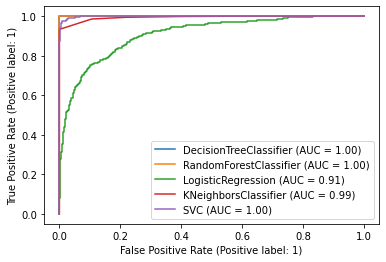

In [88]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(knn,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(svc,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check ROC_AUC plot on test data¶

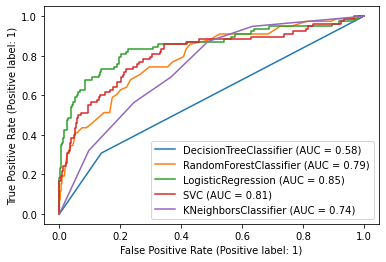

In [90]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

# Looking at accuracy, confusion matrix & roc_auc plot  i m selecting LogisticRegression with RandomizedSearchCV  hypertune parameter by using Kfold cross validation method

In [91]:
#save model
import pickle
Filename='Finalized_model.pickle'
pickle.dump(svc,open(Filename,'wb'))